First of all, loads digits' dataset with sklearn.

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [3]:
import numpy as np
import pandas as pd

Then load `Logistic Regression` from the `sklearn` package and then train it with loaded dataset. Here we are using the default values.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

# confusion matrix
# cm[4, 7]: falsely predicted as 4 when its 7
cm = np.empty((np.unique(y).shape[0], np.unique(y).shape[0]))

clfs = []
for cl in np.unique(y):
    clf = LogisticRegression()
    clf.fit(X_train, np.where(y_train == cl, 1, 0))
    clfs.append(clf)
    
for cll in np.unique(y): # correct label
    predict = clfs[cll].predict(X_test)
    for clp in np.unique(y): # predicted label
        cm[cll, clp] = np.sum(y_test[predict == 1] == clp)

pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,50.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0
2,0.0,2.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,51.0,0.0,0.0,0.0,2.0,1.0,2.0
4,0.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,69.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,1.0,1.0,0.0,61.0,0.0,0.0
8,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,44.0,2.0
9,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,59.0


Use last 25 data as an examples for the trained model.

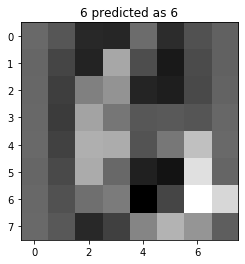

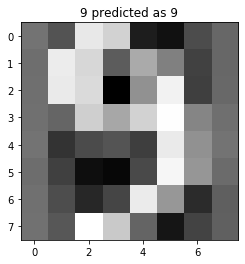

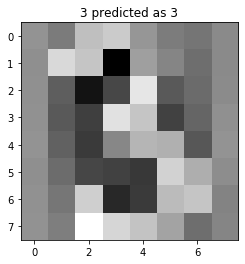

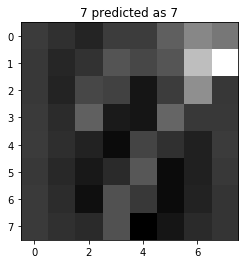

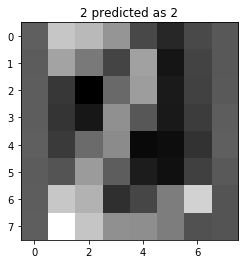

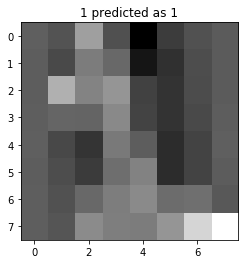

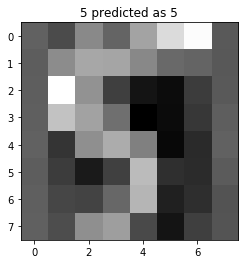

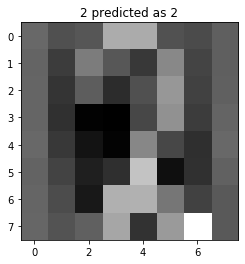

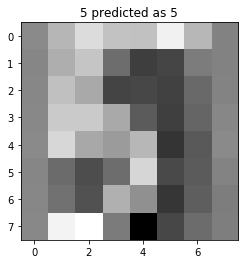

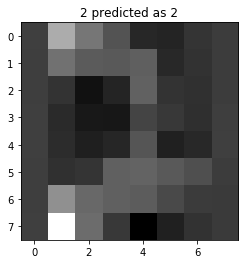

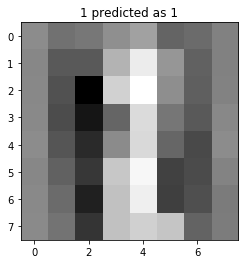

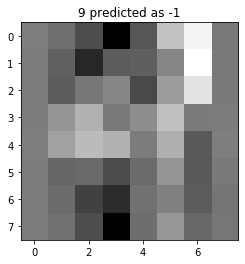

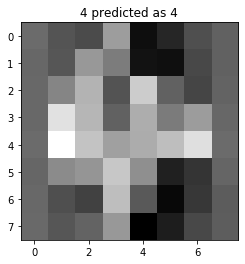

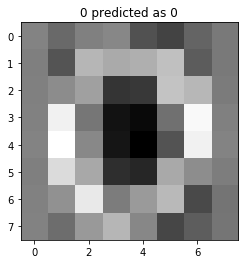

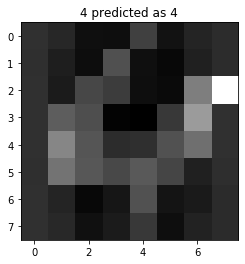

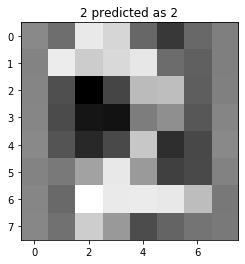

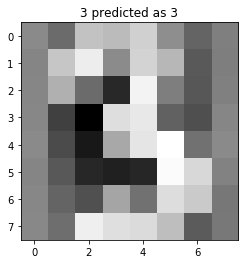

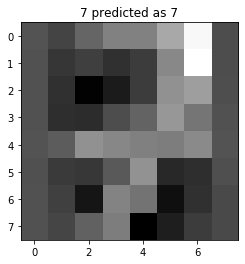

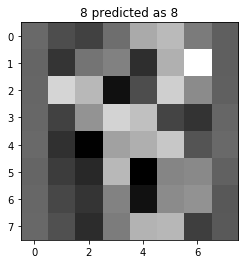

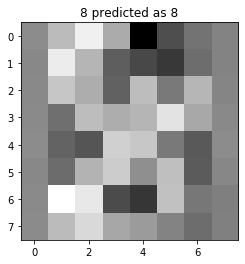

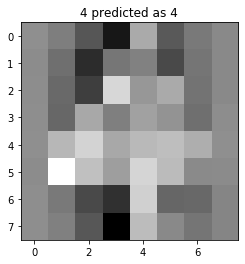

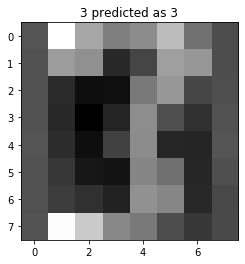

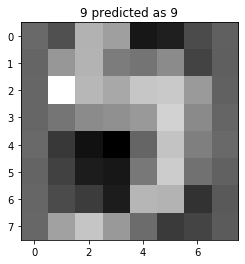

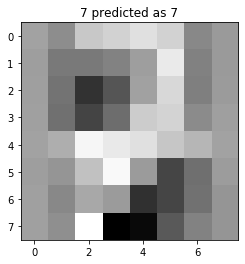

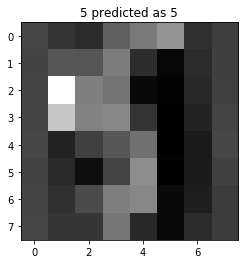

In [6]:
import matplotlib.pyplot as plt

for x, y in zip(X_test[:25,:], y_test[:25]):
    pixels = x.copy()
    pixels = np.array(pixels, dtype='float64')
    pixels = pixels.reshape((8, 8))
    
    predict = -1
    for cl in np.unique(y):
        if clfs[cl].predict([x])[0] == 1:
            predict = cl
            break

    plt.title(f'{y} predicted as {predict}')
    plt.imshow(pixels, cmap='gray')
    plt.show()